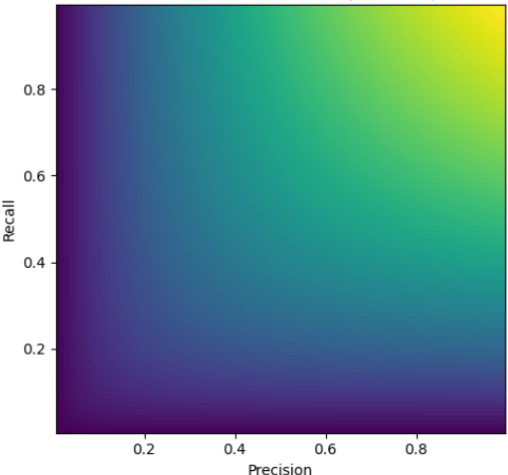

# <div style="color:blue;">1. Objektorientierung in Python</div>
# <div>2. Klassifikationsmetriken</div>
# <div>3. Regression im Entscheidungsbaum</div>

### 1.1 Klassen

Klassen in Python sind einfach zu definieren:

In [6]:
class Greeter:
    """Dokumentation der Klasse erfolgt über 3-fache Anführungszeichen"""

    # Konstructor
    def __init__(self, name):    # self ist eine Konvention und dienst zur Referenzierung der Instanz
        self.name = name         # Instanz-Variable

    # Instanz-Methode
    def greet(self, loud=False):
        if loud:
            print(f"HELLO, {self.name.upper()}")
        else:
            print(f"Hello, {self.name}!")

In [178]:
g = Greeter("Fred")   # Erzeuge eine Instanz der Greeter-Klasse
g.greet()             # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)    # Call an instance method; prints "HELLO, FRED!"

Hello, Fred!
HELLO, FRED


In [7]:
# Ruft Dokumentationsstring auf
?Greeter


In [180]:
# Ein Objekt hat standardmäßig keine "Länge"
len(g)


TypeError: object of type 'Greeter' has no len()

In [9]:
# Klassen können nachträglich verändert werden.
# Implementiere die sog. "Dunder-Methode" __len__, die von der "Funktion" len aufgerufen wird.

Greeter.__len__ = lambda self: len(self.name)
h = Greeter("Fred")
len(h)


4

### 1.2 Dunder-Methoden

In [4]:
print("Hello " + 5)

TypeError: can only concatenate str (not "int") to str

In [5]:
print("Hello " + str(5))

Hello 5


**Implementierung von ```str()``` und ```repr()```:**
- ```str(x)``` ruft die ```__str__```-Methode des Objekts ```x``` auf (```__<name>__``` sind sog. *Dunder-Methoden*)
- ```repr(x)``` ruft die ```__repr__```-Methode des Objekts ```x``` auf
- ```str(x)``` soll eine Menschen-lesbare Beschreibung des Objekts liefern.
- ```repr(x)``` soll eine vollständige Beschreibung liefern, mit der das Objekt neu erstellt werden kann.

**Implementierung von ```str()``` und ```repr()```:**
- ```str(x)``` ruft die ```__str__```-Methode des Objekts ```x``` auf (```__<name>__``` sind sog. *Dunder-Methoden*)
- ```repr(x)``` ruft die ```__repr__```-Methode des Objekts ```x``` auf
- ```str(x)``` soll eine Menschen-lesbare Beschreibung des Objekts liefern.
- ```repr(x)``` soll eine vollständige Beschreibung liefern, mit der das Objekt neu erstellt werden kann.

In [13]:
class Person:
    def __init__(self, age):   # Konstruktor
        self.age = age         # das erste Argument "self" ist ein Platzhalter für das Objekt ("this")
    
    def __str__(self):
        return "Eine Person, die {0} Jahre alt ist".format(self.age)

    def __repr__(self):
        return "Person({0})".format(self.age)

p = Person(42)

print ( str(p)  )
print ( repr(p) )

Eine Person, die 42 Jahre alt ist
Person(42)


### 1.3 Datenklassen

**Datenklassen** sind praktisch, um einfach Daten abzulegen, ohne z.B. den Klassenkontruktor zu verwenden.

In [198]:
from dataclasses import dataclass

@dataclass                     # sog. "Decorator": Ein Wrapper um eine Funktion/Klasse, der deren Funktionalität erweitert
class InventoryItem:
    """Class for keeping track of an item in inventory."""

    name: str                  # Beispiele für Type Annotations, diese sind meist optional
    unit_price: float
    quantity_on_hand: int = 0  # default value

    def total_cost(self) -> float:
        return self.unit_price * self.quantity_on_hand


item = InventoryItem(name="Schrank", unit_price=120.50, quantity_on_hand=10)
print(item.total_cost())


1205.0


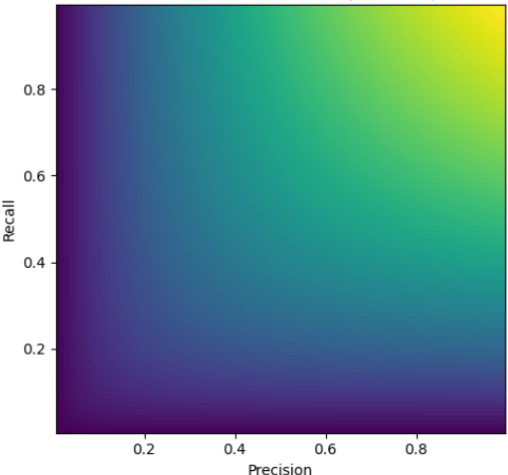

# <div>1. Objektorientierung in Python</div>
# <div style="color:blue;">2. Klassifikationsmetriken</div>
# <div>3. Regression im Entscheidungsbaum</div>

Daten einlesen:

In [21]:
import pandas as pd
df = pd.read_csv("VL02_Material/heart.csv")


# mit .head() zeigt man nur die ersten Zeilen an
df.head()


# mit .tail() werden die letzten Zeilen
# angezeigt.


# Mit dem Parameter n (default n=5)
# wird die Anzahl der Zeilen spezifiziert.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Holdout-Methode: Split der Daten in Trainings/Validierungs/Testdaten:

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] # Zielgröße HeartDisease


Verwende `train_test_split`, um Trainingsdaten abzuseparieren:


In [23]:
from sklearn.model_selection import train_test_split

# train_size als float (=Anteil der Gesamtmenge)
# oder als int (=Anzahl Datenpunkte)
X_train, X_rest, y_train, y_rest = train_test_split(
    X, y, train_size=1/3, random_state=123 )

len(X_train), len(X_rest), \
   y_train.mean(), y_rest.mean()
# 60% der Personen in den Trainingsdaten sind krank

(306, 612, 0.6013071895424836, 0.5294117647058824)

In [24]:
# Argument "stratify", um die Werte angegebener
# Spalten gleichmäßig auf die Zielmengen zu verteilen
X_train, X_rest, y_train, y_rest = train_test_split(
    X,y,train_size=1/3,random_state=123,stratify=y )

len(X_train), len(X_rest), \
   y_train.mean(), y_rest.mean()
# je 55% der Trainings- UND Testpatienten sind krank

(306, 612, 0.5522875816993464, 0.553921568627451)

Erneuter Split, um weiter in Validierungs- und Testdaten aufzuteilen mit `train_test_split(..., train_size=?)`:

In [25]:

X_val, X_test, y_val, y_test = train_test_split (
    X_rest,y_rest,train_size=1/2,random_state=456 )

len(X_train), len(X_val), len(X_test),\
   y_train.sum(), y_val.sum(), y_test.sum()


(306, 306, 306, 169, 178, 161)

In [26]:

# erneut mit Stratifizierung:
X_val, X_test, y_val, y_test = train_test_split (
    X_rest,y_rest,train_size=1/2,random_state=456,
    stratify=y_rest )

len(X_train), len(X_val), len(X_test),\
   y_train.sum(), y_val.sum(), y_test.sum()


(306, 306, 306, 169, 169, 170)

### 2.1 Ein einfaches Klassifikationsmodell

In [27]:
# Daten in einem 1/3-1/3-1/3-Split;
# die Variable y beinhaltet die Zielgröße
# HeartDisease.

len(X_train), len(X_val), \
   y_train.sum(), y_val.sum()

(306, 306, 169, 169)

In [28]:
# quick and dirty preprocessing (besser: One-Hot-Enc.)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1)

X_train = pd.DataFrame (
    enc.fit_transform(X_train.values),
    columns = X_train.columns )
X_val = pd.DataFrame (
    enc.transform(X_val.values), # not fit_transform
    columns = X_val.columns )


Training eines einfachen Modells:

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier ( max_depth=2,
                                    random_state=0 )
clf.fit ( X_train, y_train );


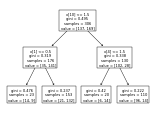

In [30]:
import matplotlib.pyplot as plt
tree.plot_tree ( clf )
plt.gcf().set_dpi(30);


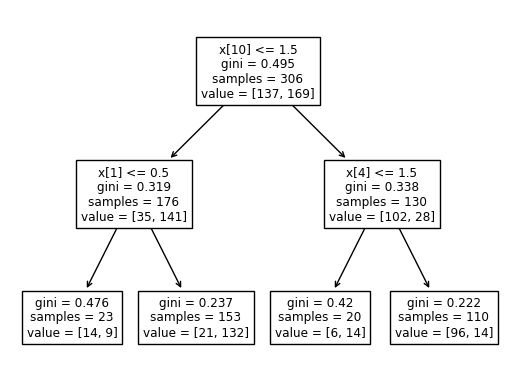

In [53]:
tree.plot_tree ( clf );

z.B. value=[6,14] bedeutet: In diesem Blatt
gibt es in den Trainingsdaten 6 Gesunde und 14 Kranke.

**Daher:**  
`clf.predict_proba(x_new) -> [[6/20,14/20]]`,  


wenn ein neuer Datenpunkt x_new so den Baum durchläuft, dass diese
Person in diesem Blatt landet.

Bei einem *Threshold* von 0.5 würde diese Person als "krank" klassifiziert werden, weil der *Score* 14/20 größer als 0.5 ist.

In [39]:
X_train.iloc[:1,:]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,34.0,1.0,0.0,44.0,87.0,1.0,1.0,23.0,1.0,26.0,1.0


In [54]:
# Links: Die finale Vorhersage
# Rechts: Der Zwischenschritt der "Wahrscheinlichkeiten"
# (hier heißt der Wert 0.86 "Score")
clf.predict ( X_train.iloc[:1,:] ), \
clf.predict_proba ( X_train.iloc[:1,:] )

(array([1], dtype=int64), array([[0.1372549, 0.8627451]]))

In [55]:
# Um von Scores zu Predictions zu kommen, muss der Score mit einem Threshold
# verglichen werden (standardmäßig 0.5):
clf.predict_proba ( X_train.iloc[:1,:] )[0,1] > 0.5

True

Berechnung der Konfusionsmatrix:

In [145]:
# predictions
pred_val = clf.predict(X_val)


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix( pred_val, y_val )


array([[ 89,  20],
       [ 48, 149]], dtype=int64)

In [85]:
# Rechts oben sollte "False Positives" sein:

( (y_val == 0) & (pred_val == 1) ).sum()

# Frage: Wo ist der Fehler?


48

In [88]:
# Dokumentation: confusion_matrix(y_true, y_pred, ...)
# => Die Reihenfolge ist wichtig, eine Vertauschung
#    spiegelt die Matrix.

confusion_matrix( y_val, pred_val )


array([[ 89,  48],
       [ 20, 149]], dtype=int64)

In [89]:
# Lieber nochmal überprüfen: "True Positives"
# sollte links oben sein:
( (y_val == 1) & (pred_val == 1) ).sum()


# Frage: ???


149

In [91]:
# Dokumentation: "other references may use
# a different convention for axes"
TN, FP, FN, TP = confusion_matrix(y_val,
                                  pred_val).flatten()
import numpy as np
np.array ( [[TP,FP],[FN,TN]] )


array([[149,  48],
       [ 20,  89]], dtype=int64)

### 2.2 Metriken für eine Binäre Klassifikation

| Wahre Klasse: |         | positiv (krank) | negativ (gesund) |
|---| ----------------------|-----------------|------------------|
| **Vorhergesagte Klasse:** | **positiv (krank)**       | 149 (TP)      | 48 (FP)   | 
|                           | **negativ (gesund)**      | 20 (FN)      | 89 (TN)   |

In [92]:
# Accuracy:
(TP+TN) / (TP+TN+FP+FN)


0.7777777777777778

In [95]:
# Erinnerung: 55% der Daten sind 1er, 45% sind 0er
y_val.mean()


0.5522875816993464

In [96]:
# Precision
TP / (TP+FP)


0.7563451776649747

In [97]:
# Recall
TP / (TP+FN)


0.8816568047337278

In [98]:
# Sensitivität (=Recall)
TP / (TP+FN)


0.8816568047337278

In [99]:
# Spezifität
TN / (TN+FP)


0.6496350364963503

<div class="alert alert-block alert-warning"><b>Frage:</b> Wann sollte welche Metrik verwendet werden?</div>

<div class="alert alert-block alert-warning"><b>Frage:</b> Wann sollte welche Metrik verwendet werden?</div>


| Wahre Klasse: |         | positiv | negativ |
|---| ----------------------|-----------------|------------------|
| **Vorhergesagte Klasse:** | **positiv**       | 149 (TP)      | 48 (FP)   | 
|                           | **negativ**      | 20 (FN)      | 89 (TN)   |

In [100]:
# Accuracy:
(TP+TN) / (TP+TN+FP+FN)


0.7777777777777778

Die Konfusionsmatrix liefert die vollständige Information. Die Accuracy ist eine Komprimierung auf eine Zahl, die sinnvoll verwendet werden kann bei balancierten Daten.


In [101]:
# Precision, Recall
TP / (TP+FP), TP / (TP+FN)


(0.7563451776649747, 0.8816568047337278)

Das Begriffspaar Precision/Recall ist maßgeschneidert auf den "typischen" Fall, dass "Positives" selten sind.
- Precision: Wie groß ist die WSK, dass ich krank bin, wenn ich einen positiven Test habe?
- Recall: Wie viele von den "Positives" in der Gesamtpopulation werden erkannt?

<div class="smallfont">Das Paar Precision/Recall kann im sog. F1-Score zusammengefasst werden.</div>

In [102]:
# Sensitivität, Spezifität
TP / (TP+FN), TN / (TN+FP)


(0.8816568047337278, 0.6496350364963503)

Sensitivität/Spezifität ist symmetrisch formuliert für Positives und Negatives.<div class="smallfont">Können, noch bevor ein Threshold Scores in Predictions übersetzt, im sog. (ROC-)AUC kombiniert werden; nützliches frühes Optimierungsziel.</div>

### 3.3 Precision-Recall-Tradeoff

In [105]:
# Erinnerung: Klassifikationsmodelle geben i.A.
# scores aus, aus denen durch Prüfung auf
# Schwellenwertüberschreitung
# Vorhersagen generiert werden.

scores = clf.predict_proba ( X_val )
scores[:20,:]


array([[0.87272727, 0.12727273],
       [0.87272727, 0.12727273],
       [0.1372549 , 0.8627451 ],
       [0.1372549 , 0.8627451 ],
       [0.87272727, 0.12727273],
       [0.3       , 0.7       ],
       [0.87272727, 0.12727273],
       [0.1372549 , 0.8627451 ],
       [0.87272727, 0.12727273],
       [0.87272727, 0.12727273],
       [0.1372549 , 0.8627451 ],
       [0.1372549 , 0.8627451 ],
       [0.87272727, 0.12727273],
       [0.87272727, 0.12727273],
       [0.60869565, 0.39130435],
       [0.1372549 , 0.8627451 ],
       [0.1372549 , 0.8627451 ],
       [0.60869565, 0.39130435],
       [0.60869565, 0.39130435],
       [0.87272727, 0.12727273]])

In [107]:
# typischerweise versteht man unter Scores den Wert
# für die Klasse 1
scores = scores[:,1]
scores[:5]

array([0.12727273, 0.12727273, 0.8627451 , 0.8627451 , 0.12727273])

In [108]:
# Generierung von binären Vorhersagen
threshold = 0.5
pred_val2 = (scores > threshold)
pred_val2[:5]

array([False, False,  True,  True, False])

In [109]:
# Stimmen unsere Vorhersagen überein mit den
# Vorhersagen von clf.predict()?
pred_val = clf.predict(X_val)
(pred_val == pred_val2).mean()

1.0

In [112]:
# Veränderung des Thresholds
threshold = 0.1
pred_val2 = (scores > threshold)
pred_val2[:5]

array([ True,  True,  True,  True,  True])

 ### 2.4 Zusammenfassung

Ein niedriger Threshold würde zu vielen 1-Vorhersagen führen (niedrige Precision, hoher Recall).

Ein hoher Threshold würde zu vielen 0-Vorhersagen führen (hohe Precision, niedrige Recall).

Der **Precision-Recall Tradeoff** besagt, dass durch die Wahl des Thresholds nicht Precision und Recall gleichzeitig maximiert werden können. Der Threshold wird unter Berücksichtigung der "Kosten" für False Positives und False Negatives für den konkreten Anwendungsfall optimiert.

**Beispiel:** In einem Krebstest möchte man vielleicht eine hohe Sensitivität (=Recall) erreichen und nimmt eine niedrige Precision in Kauf, da man "False Positives" als weniger schlimm bewertet als "False Negatives".

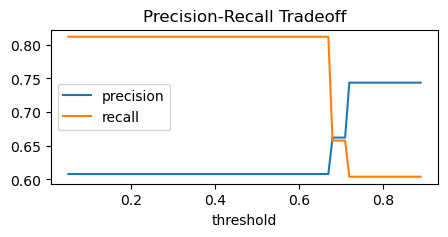

In [448]:
from sklearn.metrics import precision_score, \
                            recall_score

# generiere Predictions für verschiedene Thresholds
thresholds = np.arange(0.05,0.9,0.01)
preds      = [(scores > t) for t in thresholds]

# Berechne jeweils Precision und Recall
precs   = [precision_score(y_val,p) for p in preds]
recalls = [recall_score(y_val,p)    for p in preds]

# Visualisierung
fig,ax = plt.subplots ( figsize=(5,2) )
ax.plot ( thresholds, precs,   label="precision" )
ax.plot ( thresholds, recalls, label="recall" )
ax.set_title("Precision-Recall Tradeoff")
ax.set_xlabel("threshold")
ax.legend();


### 2.6 F1-Score als harmonischer Mittelwert von Precision und Recall

Um eine eindimensionale Zielgröße zu haben, wird oft der F1-Score verwendet:
$$
\text{F1} = \frac{2}{1/\text{Precision}+1/\text{Recall}}
$$

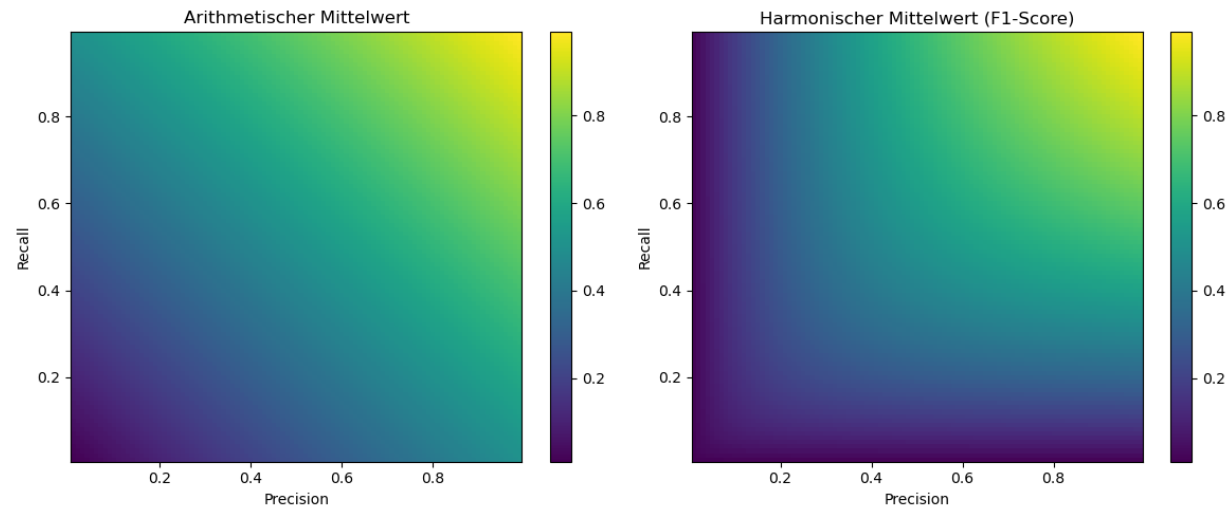

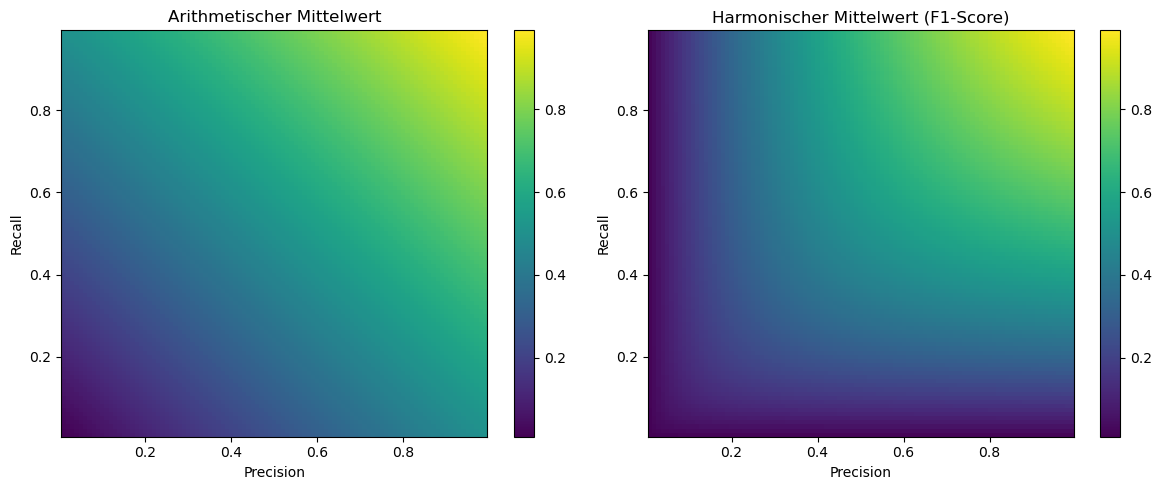

In [113]:
# create all possible precision/recall combinations
precision = np.arange(0.01,1.0,0.01)
recall = np.arange(0.01,1.0,0.01)
xs, ys = np.meshgrid ( precision, recall )

# create the first plot: arithmetic mean
fig, axes = plt.subplots ( figsize = (12,5), ncols=2 )
im = axes[0].pcolormesh ( xs, ys, xs/2 + ys/2 )
axes[0].set_title ( "Arithmetischer Mittelwert" )
axes[0].set_xlabel("Precision")
axes[0].set_ylabel("Recall")
plt.colorbar( im )

# create the second plot: harmonic mean
im = axes[1].pcolormesh ( xs, ys, 2/(1/xs + 1/ys) )
axes[1].set_title ( "Harmonischer Mittelwert (F1-Score)" )
axes[1].set_xlabel("Precision")
axes[1].set_ylabel("Recall")
plt.colorbar( im )
plt.tight_layout()

Der harmonische Mittelwert erzwingt, dass der Mittelwert 0 ist, wenn einer der beiden Werte 0 ist.

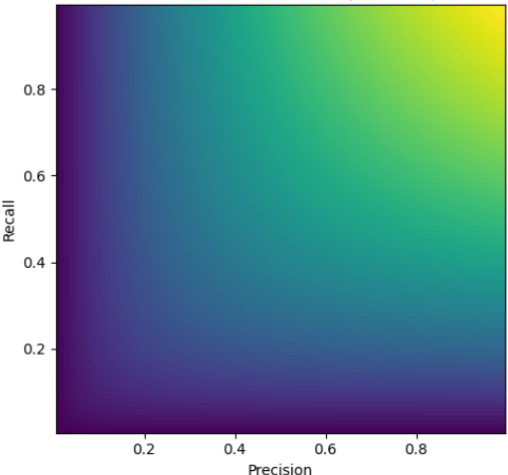

# <div>1. Objektorientierung in Python</div>
# <div>2. Klassifikationsmetriken</div>
# <div style="color:blue;">3. Regression im Entscheidungsbaum</div>

### 3.1 Daten mit einer kontinuierlichen Zielgröße

In [146]:
# load the diabetes dataset
from sklearn.datasets import load_diabetes
X = load_diabetes(as_frame=True)

# unpack values
X,y = X["data"], X["target"]
df = pd.concat([X,y],axis=1)
df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [79]:
# df.info() für einen ersten Überblick.
# Ergebnis: Wir haben keine fehlenden Werte.
# Alle Daten sind numerisch.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Features s1-s6 sind diverse Blutwerte:

| Spalte | Beschreibung |
|--------|--------------|
age | age in years
sex | sex
bmi | body mass index
bp | average blood pressure
s1 | tc, total serum cholesterol
s2 | ldl, low-density lipoproteins
s3 | hdl, high-density lipoproteins
s4 | tch, total cholesterol / HDL
s5 | ltg, possibly log of serum triglycerides level
s6 | glu, blood sugar level
target | a quantitative measure of disease progression one year after baseline

<br><br>
<div class="tinyfont">https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset</div>

In [80]:
# df.describe() für eine Beschreibung der numerischen Spalten durch diverse "Statistiken" (=Kenngrößen).
df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


**Lagemaße** `mean` und `50%-Quantil` (=Median):  
*Wo liegen die Daten etwa?*

**Streumaße** `std` (=Standardabweichung) oder   
`Inter Quartile Range`=`75%- minus 25%-Quantil`:  
*Wie sehr streuen die Daten?*  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

In [85]:
df["sex"].head()


0    0.050680
1   -0.044642
2    0.050680
3   -0.044642
4   -0.044642
Name: sex, dtype: float64

In [88]:
# Documentation: Each of these 10 feature variables
# have been mean centered and scaled by the standard
# deviation times the square root of n_samples
df["sex"].mean(), df["sex"].std()*np.sqrt(len(df))


(1.2307902309192911e-17, 1.00113314483946)

Abschließend: Überblick verschaffen.

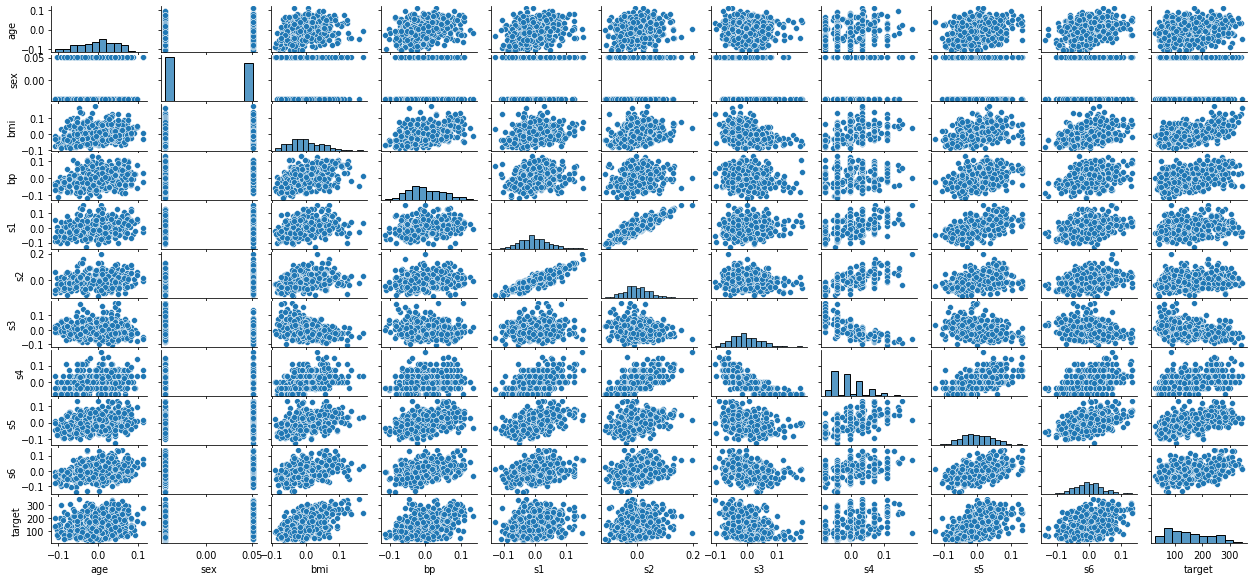

In [95]:
# 11 Spalten sind vielleicht doch zu viel?
import seaborn as sns; sns.pairplot ( df )
plt.gcf().set_size_inches ( 18, 8 ); plt.gcf().set_dpi(70);


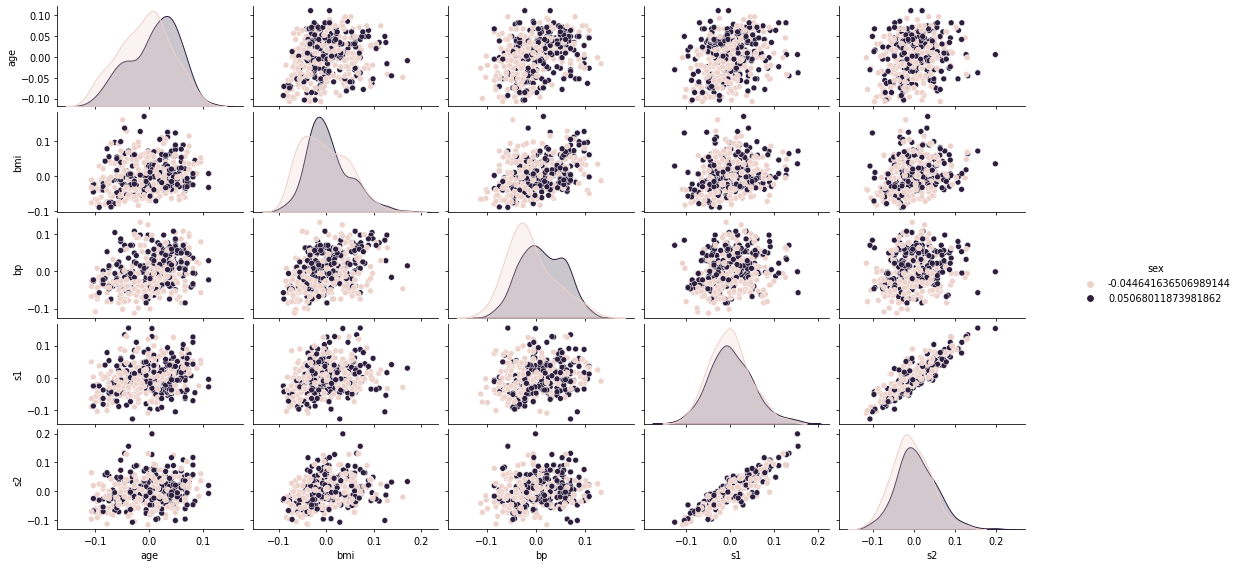

In [96]:
# Plot 1 von 4
cols = [c for c in df.columns if c != "sex"]
sns.pairplot ( df, x_vars=cols[:5], y_vars=cols[:5], hue="sex" )
plt.gcf().set_size_inches ( 18, 8 ); plt.gcf().set_dpi(70);


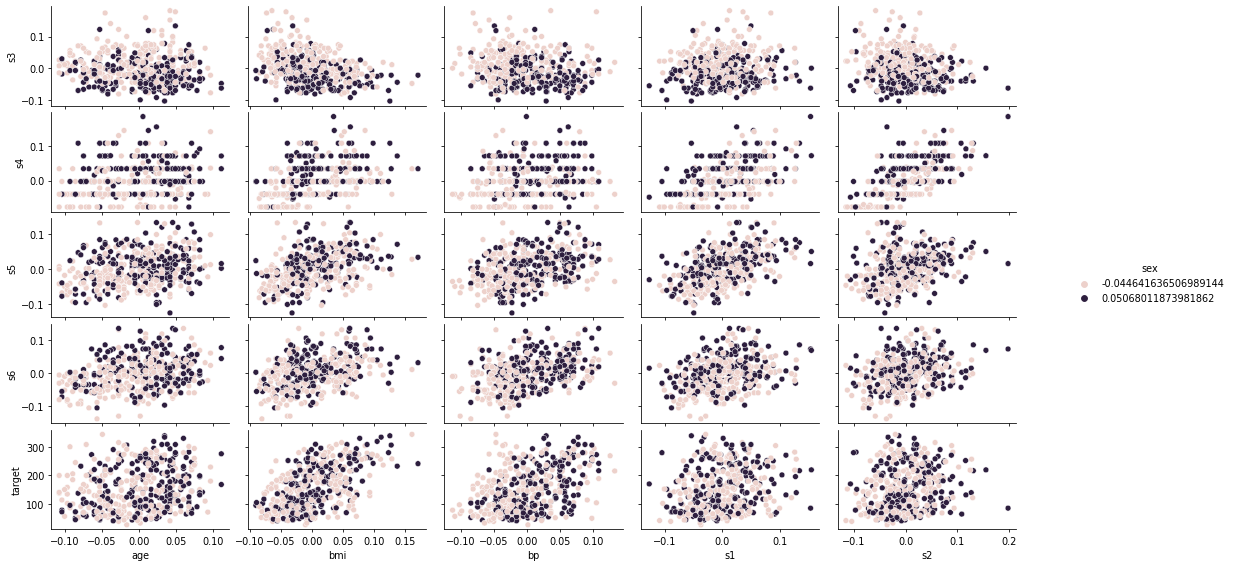

In [98]:
# Plot 2 von 4
sns.pairplot ( df, x_vars=cols[:5], y_vars=cols[5:], hue="sex" )
plt.gcf().set_size_inches ( 18, 8 ); plt.gcf().set_dpi(70);


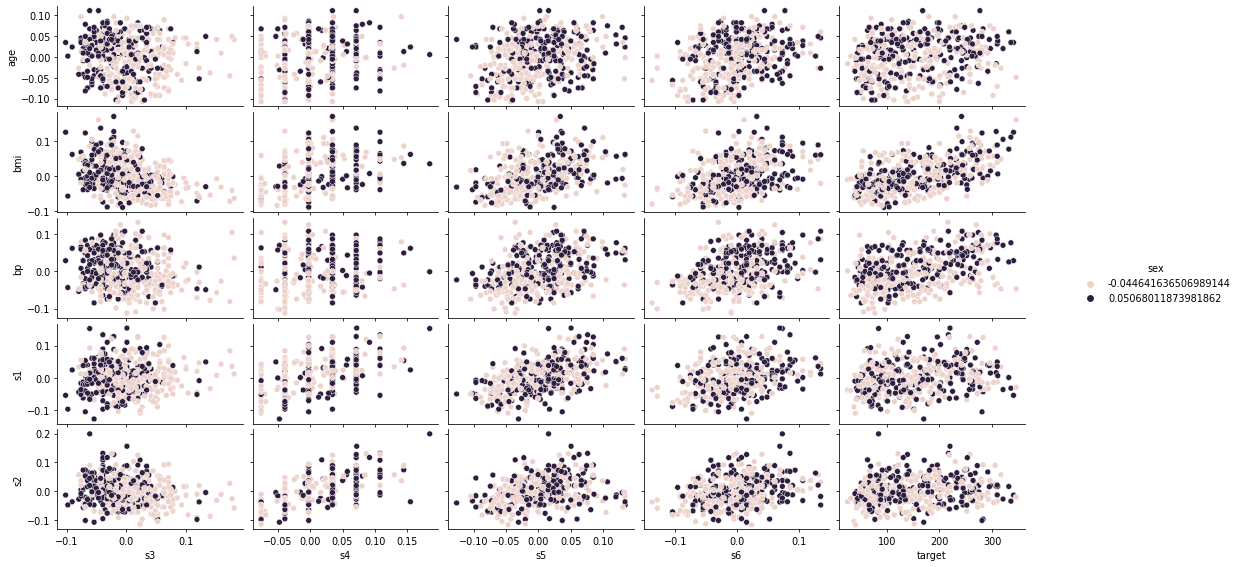

In [99]:
# Plot 3 von 4
sns.pairplot ( df, x_vars=cols[5:], y_vars=cols[:5], hue="sex" )
plt.gcf().set_size_inches ( 18, 8 ); plt.gcf().set_dpi(70);


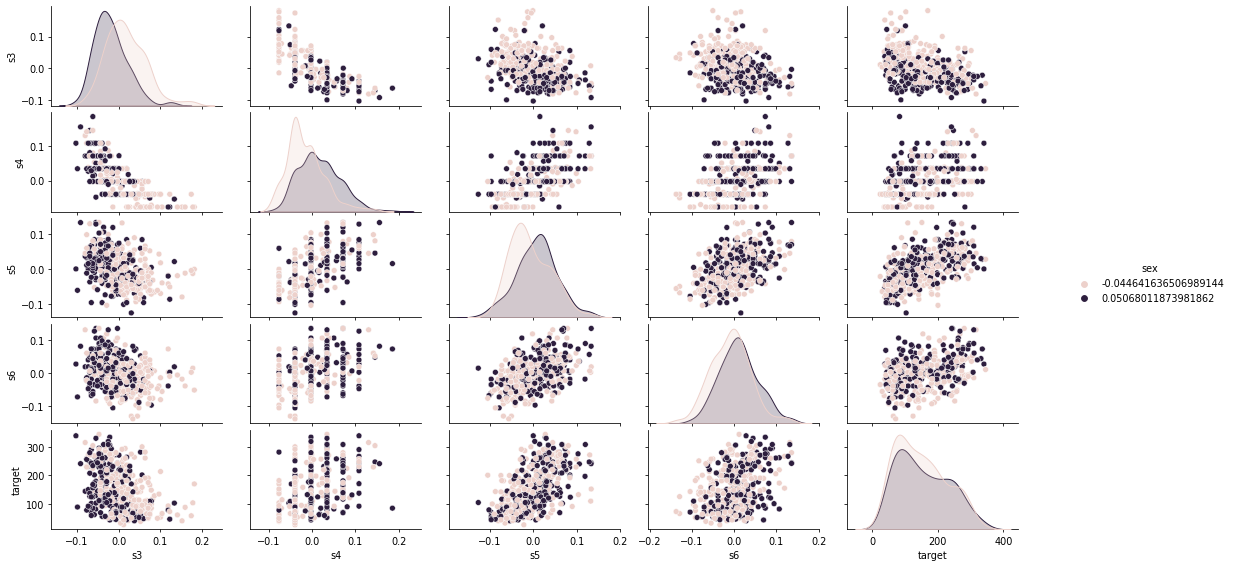

In [100]:
# Plot 4 von 4
sns.pairplot ( df, x_vars=cols[5:], y_vars=cols[5:], hue="sex" )
plt.gcf().set_size_inches ( 18, 8 ); plt.gcf().set_dpi(70);


**Ergebnisse** (z.B.):

Blutwerte sind z.T. hochkorreliert, hier `s1` (=total serum cholesterol) und `s2` (=low-density lipoproteins).

<center><img src="VL05_Material/diab_s1s2.png" /></center>

Die Zielgröße `target` zeigt z.B. mit der Variable `bmi` eine hohe Korrelation.

<center><img src="VL05_Material/diab_targetbmi.png" /></center>

### 3.2 Train-Test-Split und Training eines Entscheidungsbaums

In [116]:
# Verzichte der Einfachheit halber auf einen
# zusätzlichen Testdatensatz
# (wir tun so, als hätten wir diesen bereits
# zur Seite gelegt)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
   train_test_split(X, y, random_state=42,
                    train_size=0.6, stratify=X["sex"])

len(X_train), len(X_test)


(265, 177)

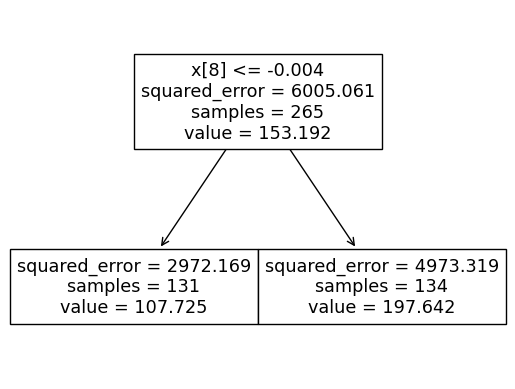

In [117]:
# Trainiere einen Entscheidungsbaum
# auf den Regressions-Task, die kontinuierliche
# Zielgröße "target" vorherzusagen
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor( max_depth=1 )
reg.fit ( X_train, y_train )

from sklearn.tree import plot_tree
plot_tree ( reg );


### 3.3 Predictions für verschiedene Baumtiefen

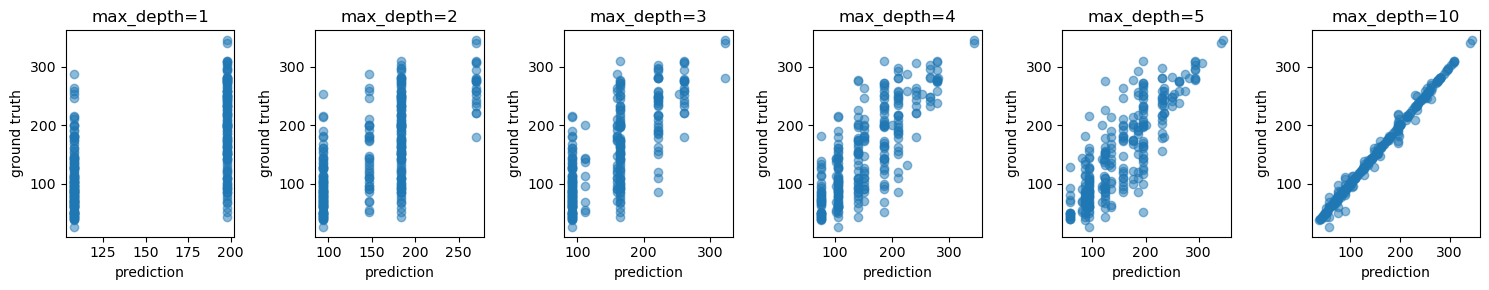

In [121]:
fig, axes = plt.subplots ( figsize=(15,3), ncols=6 )
for max_depth, ax in zip ( [1,2,3,4,5,10], axes ):
    # train
    reg = DecisionTreeRegressor( max_depth=max_depth, random_state=0 )
    reg.fit ( X_train, y_train )
    
    # plot the predictions on the training set
    ax.scatter ( reg.predict(X_train), y_train, alpha=0.5 )
    ax.set_xlabel ( "prediction" )
    ax.set_ylabel ( "ground truth" )
    ax.set_title ( "max_depth="+str(max_depth) )
plt.tight_layout()


<div class="alert alert-block alert-warning"><b>Frage:</b> Wie viele Werte kann das Modell annehmen?</div>

<div class="alert alert-block alert-success">Bei Baumtiefe k können 2^k Werte angenommen werden.</div>

### 3.4 Algorithmus des Entscheidungsbaums für eine Regression

<span class="tinyfont">Modifikation des CART-Algorithmus: https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation; siehe auch ID3, C4.5 und C5.0 für alternative Implementationen.</span>
<div class="smallfont">
1. Für jedes Feature $j\in\{1,...,n\}$ und jeden möglichen Splitwert $t$, zerlege die Daten in Mengen $Q^\text{left}(j,t)$ und $Q^\text{right}(j,t)$, definiert via
\begin{align*}
Q^\text{left}(j,t) &= \{(x,y)\in Q\,|\,x_j \le t \} \\
Q^\text{right}(j,t) &= Q \setminus Q^\text{left}(j,t)
\end{align*}
</div>

<div class="smallfont">2. Die Qualität eines Splits $\theta = (j,t)$ wird bewertet durch eine Impurity-Funktion $H$ (<span style="color:orange">bei einer Regression: <b>H=squared_error</b></span>):
\begin{align*}
\text{gemittelte Impurity nach dem Split: }G(Q,\theta) = \frac{N^\text{left}}{N} H \left( Q^\text{left}(\theta) \right) + \frac{N^\text{right}}{N} H \left( Q^\text{right}(\theta) \right)
\end{align*}
Hierbei ist $N=|Q|$ und $N^\text{left}=|Q^\text{left}(\theta)|$, $N^\text{right}=|Q^\text{right}(\theta)|$.
</div>

<div class="smallfont">
3. Wähle den Split $\theta^\ast$, der die niedrigste Impurity $G(Q,\theta)$ erzeugt: $\theta^\ast = \text{argmin}_\theta G(Q,\theta)$.
</div>

<div class="smallfont">
4. Fahre rekursiv fort auf $Q^\text{left}(\theta^\ast)$ und $Q^\text{right}(\theta^\ast)$, bis eine geeignete Abbruchbedingung erreicht ist: "until max_depth is reached, $N<\text{min_samples}$ or $N=1$".</div>

<div class="alert alert-block alert-info"><b>Impurity-Funktion für die Regression:</b> Wir betrachten wie oben eine Teilmenge $Q$ der Daten.  

&nbsp;
1. Berechne den Mittelwert der Zielgröße $\overline{y}_Q = \frac{1}{|Q|}\sum_{(x,y)\in Q}y$
2. Die Impurity ist die gemittelte quadratische Abweichung vom Mittelwert (=Varianz*): $H(Q) = \frac{1}{|Q|}\sum_{(x,y)\in Q}(y-\overline{y}_Q)^2$

</div>
<div class="smallfont">* ... bis auf Verwendung des Normierungsfaktors 1/|Q| statt 1/(|Q|-1), der üblicherweise für die empirische Varianz verwendet wird.</div>

### 3.5 Vorgehen für die Inference-Phase (Vorhersage des kontinuierlichen Zielwerts auf neuen Daten)

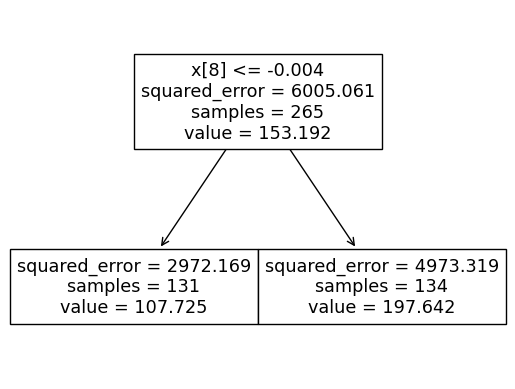

In [117]:
# Trainiere einen Entscheidungsbaum
# auf den Regressions-Task, die kontinuierliche
# Zielgröße "target" vorherzusagen
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor( max_depth=1 )
reg.fit ( X_train, y_train )

from sklearn.tree import plot_tree
plot_tree ( reg );


Vorgehen für neue Daten:
- Während des Trainings wird die Trainingsmenge in kleinere Teile unterteilt entsprechend der Baumstruktur.

- Für jedes Blatt im Baum wird der Mittelwert über die kontinuierliche Zielgröße berechnet ("value" in der Grafik links).

- Dieser Mittelwert des betreffenden Blatts wird als Vorhersagewert verwendet, wenn der neue Datenpunkt in diesem Blatt landet. (Daher gibt es max. 2^Baumtiefe Vorhersagewerte.)

$$
\text{prediction}(x_\text{new}) = \frac{1}{n_{\text{Blatt}(x_\text{new})}} \sum_{i\in 
\text{Blatt}(x_\text{new})
} y_{i}
$$
<br><br>

<div class="alert alert-block alert-warning"><b>Frage:</b> Wie messen wir die Qualität der Vorhersage?</div>

<div class="alert alert-block alert-success">Wir errechnen den "Abstand" der Vorhersage von der Ground Truth. (RMSE oder R²)</div>

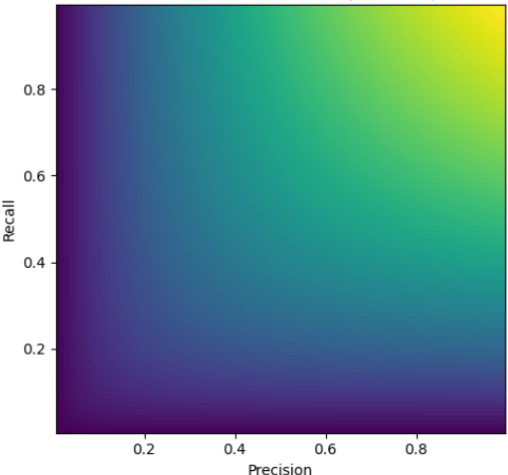

# <div style="color:gray;">1. Objektorientierung in Python</div>
# <div style="color:gray;">2. Klassifikationsmetriken</div>
# <div style="color:gray;">3. Regression im Entscheidungsbaum</div>

# Vielen Dank für Ihre Aufmerksamkeit!

### 2.3 MultiIndex

In [188]:
# MultiIndex via Index auf zwei Spalten
df2.set_index( ["Age", "Sex"], inplace=True )
df2.index


MultiIndex([(49, 'F'),
            (37, 'M'),
            (48, 'F'),
            (54, 'M'),
            (39, 'M'),
            (45, 'F'),
            (54, 'M'),
            (37, 'M'),
            (48, 'F'),
            (37, 'F'),
            ...
            (63, 'M'),
            (63, 'F'),
            (41, 'M'),
            (59, 'M'),
            (57, 'F'),
            (45, 'M'),
            (68, 'M'),
            (57, 'M'),
            (57, 'F'),
            (38, 'M')],
           names=['Age', 'Sex'], length=917)

In [189]:
# Zur Demonstration: erstelle ein kleineres DataFrame
df3 = df2.head().copy()
df3


,,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,Sex,,,,,,,,,,
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [191]:
# Manuelle Zuweisung
df3.index = pd.MultiIndex.from_tuples(
  [("A",1,1),("B",1,1),("A",2,1),("A",1,2),("B",1,2)]
)
df3


ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
A 1 1           NAP        160          180          0     Normal    156   
B 1 1           ATA        130          283          0         ST     98   
A 2 1           ASY        138          214          0     Normal    108   
  1 2           NAP        150          195          0     Normal    122   
B 1 2           NAP        120          339          0     Normal    170   

      ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
A 1 1              N      1.0     Flat             1  
B 1 1              N      0.0       Up             0  
A 2 1              Y      1.5     Flat             1  
  1 2              N      0.0       Up             0  
B 1 2              N      0.0       Up             0

Verwendung des MultiIndex:

In [193]:
# sort_index zur Sortierung des Index
# (verwende sort_values zur Sortierung nach Spalten)
df3.sort_index ( inplace=True )
df3


ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
A 1 1           NAP        160          180          0     Normal    156   
    2           NAP        150          195          0     Normal    122   
  2 1           ASY        138          214          0     Normal    108   
B 1 1           ATA        130          283          0         ST     98   
    2           NAP        120          339          0     Normal    170   

      ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
A 1 1              N      1.0     Flat             1  
    2              N      0.0       Up             0  
  2 1              Y      1.5     Flat             1  
B 1 1              N      0.0       Up             0  
    2              N      0.0       Up             0

In [194]:
# verwende .xs statt .loc:
# Rückgabewert sind alle Zeilen (axis=0),
# die auf der 2. Ebene (level=1)
# den Wert 1 haben.
df3.xs( 1, axis=0, level=1 )


ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
A 1           NAP        160          180          0     Normal    156   
  2           NAP        150          195          0     Normal    122   
B 1           ATA        130          283          0         ST     98   
  2           NAP        120          339          0     Normal    170   

    ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
A 1              N      1.0     Flat             1  
  2              N      0.0       Up             0  
B 1              N      0.0       Up             0  
  2              N      0.0       Up             0